## UCB

In [19]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../")

from lib.envs.bandits.bandit import BanditEnv
from lib.simulation import Experiment
from lib.envs.bandits.policy import Policy
from lib.utils import randargmax

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
class UCB(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "UCB"
        self.round = 0
        self.total_counts = np.zeros(num_actions, dtype = np.float32)
        self.total_rewards = np.zeros(num_actions, dtype = np.float32)
        
    def act(self):
        self.round += 1
        self.current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        self.current_averages[self.total_counts <= 0] = 0.5
        
        if self.round <= self.num_actions:
            """The first k rounds, where k is the number of arms/actions, play each arm/action once"""
            current_action = (self.round-1) % self.num_actions
        else:
            """At round t, play the arms with maximum average and exploration bonus"""
            current_action = np.argmax(self.current_averages + np.sqrt(2 * np.log(self.round) / (self.total_counts)))
            
        return current_action
    
    def feedback(self, action, reward):
            self.total_rewards[action] += reward
            self.total_counts[action] += 1

Distribution: normal [-0.33846509  0.49892913 -1.41162122  0.34035621  0.00303444 -0.02761236
  1.12248813 -0.39251959 -1.82636156 -1.49798138]
Optimal action: 6


<Figure size 720x360 with 0 Axes>

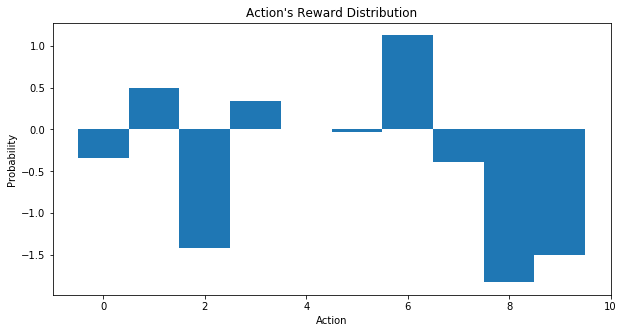

--------------------------------------------------
Policy: UCB 
Average Reward: 1.1047025065293492 
Average Regret: 0.014036103279490368
Arm pulls: [9.000e+00 4.400e+01 3.000e+00 3.400e+01 1.800e+01 1.700e+01 9.862e+03
 8.000e+00 2.000e+00 3.000e+00]


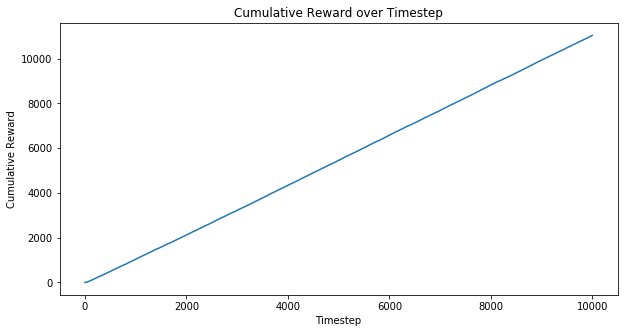

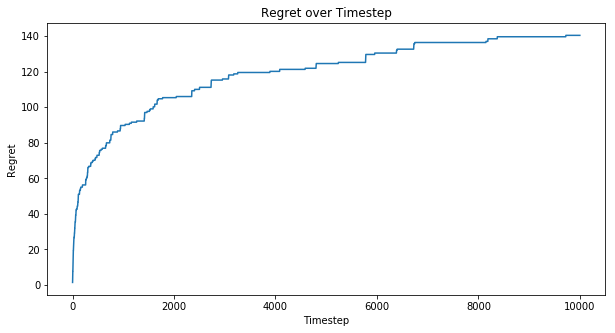

In [18]:
evaluation_seed = None
num_actions = 10
trials = 10000
distribution = "normal"
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = UCB(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)